In [1]:
%pylab inline

import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Activation, Lambda
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from config_reader import config_reader
import scipy
import math
import cv2
import matplotlib.pyplot as plt
import keras.applications as apps

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def preprocess(oriImg, target_size=224):
    scale = float(target_size) / float(max(oriImg.shape[0], oriImg.shape[1]))
    print "SCALE: ",scale
    imageToTest = cv2.resize(oriImg, (0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    res = np.empty((224,224,3),dtype=np.ubyte)
    res[:,:,:] = 128
    w,h = imageToTest.shape[:2]
    res[:w,:h] = imageToTest
    input_img = res[np.newaxis, :, :, :] # required shape (1, width, height, channels)

    return input_img

In [3]:
img = cv2.imread("sample_images/ski.jpg")

In [4]:
img = preprocess(img)

SCALE:  0.314606741573


(1, 224, 224, 3)


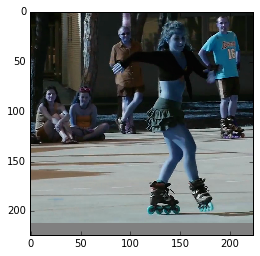

In [5]:
print img.shape
plt.imshow(img[0].astype(np.ubyte))

In [6]:
net = apps.MobileNet()
# net = apps.inception_resnet_v2.InceptionResNetV2()

In [33]:
%timeit res = net.predict(img)

100 loops, best of 3: 3.82 ms per loop


In [13]:
res = np.squeeze(res)

In [29]:
ind = np.argsort(res)[-5:]

In [32]:
zip(res[ind],ind)[::-1]

[(0.52684903, 794),
 (0.15305519, 556),
 (0.055160806, 782),
 (0.032152556, 549),
 (0.024394542, 664)]

In [35]:
net = apps.MobileNet?

In [7]:
net = apps.MobileNet((224,224,3), include_top=False, weights="imagenet", pooling=None)

17235968/17225924 [==============================] - 14s 1us/step


In [8]:
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 112, 112, 32)      0         
__________

In [5]:
import mobnet_model

In [8]:
net = mobnet_model.get_testing_model((224,224,4))

In [9]:
net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 4)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 224, 224, 4)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 1152        lambda_2[0][0]                   
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu